# Задание 2. Определение параметров закона распределения генеральной совокупности

## Цель работы

Оценить параметры логнормального распределения различными методами:
1. Точечные оценки (выборочное среднее и дисперсия)
2. Метод scipy.stats
3. Метод моментов (3 варианта)
4. Метод максимального правдоподобия

Построить эмпирические и теоретические функции распределения и плотности.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import lognorm
from scipy.optimize import fsolve
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.stats import kstest

plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

## Шаг 1. Выбор параметров из таблицы 1

Выберите свои значения a, b и N из таблицы 1.

**Таблица 1:**
- a: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4
- b: 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 1, 0.1, 0.2, 0.3, 0.4
- N: 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 100, 200, 300, 400

In [15]:
# ПАРАМЕТРЫ ИЗ ТАБЛИЦЫ 1 (выберите свой вариант)
# Пример: первый вариант
a_true = 1  # параметр a (scale parameter: scale = exp(a))
b_true = 0.9  # параметр b (shape parameter: s = b)
N = 100  # размер выборки

print(f"Заданные параметры из таблицы 1:")
print(f"a = {a_true}")
print(f"b = {b_true}")
print(f"N = {N}")
print(f"\nПараметры логнормального распределения:")
print(f"μ (mu) = a = {a_true}")
print(f"σ (sigma) = b = {b_true}")
print(f"scale = exp(a) = {np.exp(a_true):.4f}")
print(f"s = b = {b_true}")

Заданные параметры из таблицы 1:
a = 1
b = 0.9
N = 100

Параметры логнормального распределения:
μ (mu) = a = 1
σ (sigma) = b = 0.9
scale = exp(a) = 2.7183
s = b = 0.9


## Шаг 2. Генерация выборки

Генерируем выборку из логнормального распределения с заданными параметрами.

В SciPy: `lognorm(s, scale)` где:
- s = σ (стандартное отклонение логарифма)
- scale = exp(μ) (экспонента от среднего логарифма)

In [16]:
# Генерация выборки
sample = lognorm.rvs(s=b_true, scale=np.exp(a_true), size=N)

print(f"Выборка сгенерирована: {N} элементов")
print(f"\nПервые 10 значений:")
print(sample[:10])
print(f"\nОписательная статистика выборки:")
print(f"Минимум: {np.min(sample):.4f}")
print(f"Максимум: {np.max(sample):.4f}")
print(f"Среднее: {np.mean(sample):.4f}")
print(f"Медиана: {np.median(sample):.4f}")
print(f"Стд. отклонение: {np.std(sample, ddof=1):.4f}")

Выборка сгенерирована: 100 элементов

Первые 10 значений:
[ 0.77838141  9.08274571 16.13833998  6.47740962  1.79392981 14.61534139
  3.90069967  3.38196647  2.45762564  3.51747542]

Описательная статистика выборки:
Минимум: 0.2237
Максимум: 22.2182
Среднее: 4.2079
Медиана: 3.1735
Стд. отклонение: 3.8378


## Шаг 3. Построение эмпирической функции распределения и гистограммы

In [17]:
def empirical_cdf_evaluate(sample, x_values):
    # Сортируем выборку
    sample_sorted = np.sort(sample)
    n = len(sample_sorted)
    
    # Если x_values - одно число, преобразуем в массив
    x_values = np.atleast_1d(x_values)
    
    # Вычисляем F(x) для каждого значения x
    result = np.zeros_like(x_values, dtype=float)
    
    for i, x in enumerate(x_values):
        # Количество элементов выборки, меньших x
        count = np.sum(sample_sorted < x)
        # Эмпирическая ФР: F(x) = количество элементов < x / общее количество
        result[i] = count / n
    
    return result[0] if len(result) == 1 else result

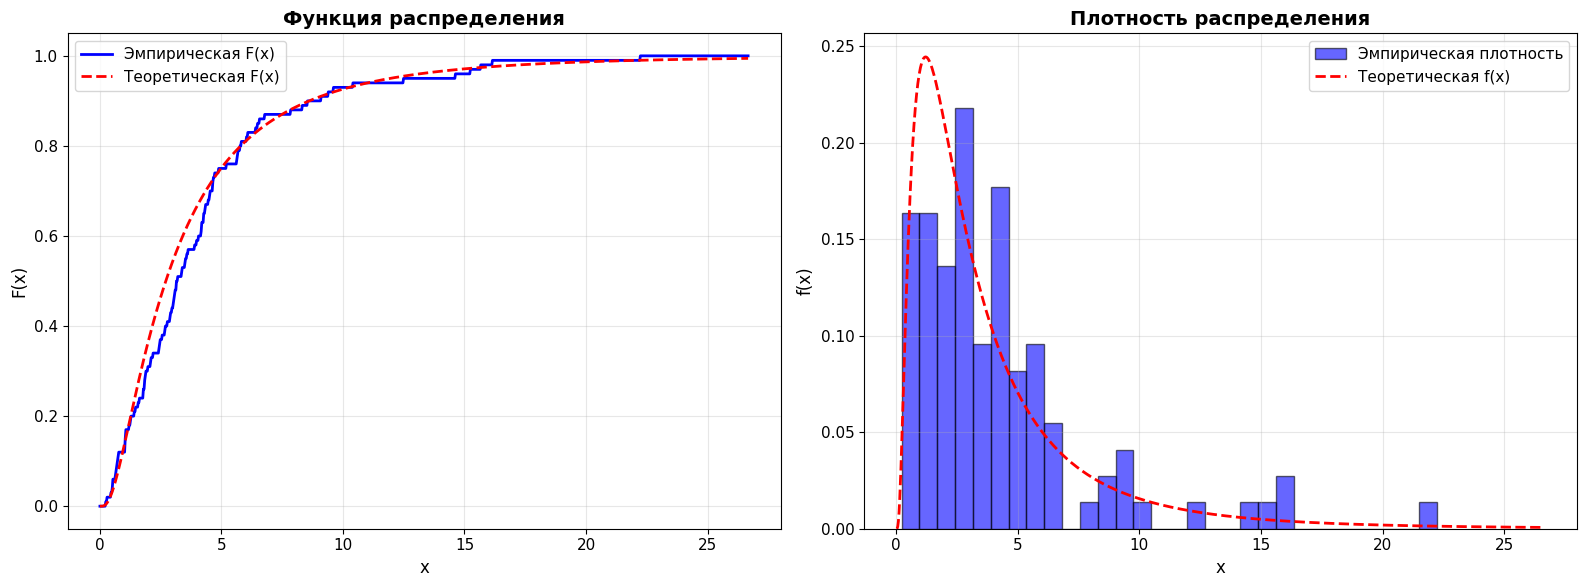

0.89


In [18]:
# Теоретическая функция распределения
x_range = np.linspace(0.01, np.max(sample)*1.2, 1000)
theoretical_cdf = lognorm.cdf(x_range, s=b_true, scale=np.exp(a_true))
theoretical_pdf = lognorm.pdf(x_range, s=b_true, scale=np.exp(a_true))
empirical_cdf = empirical_cdf_evaluate(sample, x_range)

# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Эмпирическая и теоретическая функции распределения
#axes[0].step(sample_sorted, empirical_cdf, where='post', label='Эмпирическая F(x)', linewidth=2, color='blue')
axes[0].plot(x_range, empirical_cdf, label='Эмпирическая F(x)', linewidth=2, color='blue')
axes[0].plot(x_range, theoretical_cdf, label='Теоретическая F(x)', linewidth=2, color='red', linestyle='--')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('F(x)', fontsize=12)
axes[0].set_title('Функция распределения', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Гистограмма и теоретическая плотность
axes[1].hist(sample, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label='Эмпирическая плотность')
axes[1].plot(x_range, theoretical_pdf, label='Теоретическая f(x)', linewidth=2, color='red', linestyle='--')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('f(x)', fontsize=12)
axes[1].set_title('Плотность распределения', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print(empirical_cdf_evaluate(sample, 8.35))

## Шаг 4. Точечные оценки математического ожидания и дисперсии

Для логнормального распределения с параметрами μ и σ:

$$E[X] = e^{\mu + \sigma^2/2}$$

$$Var[X] = (e^{\sigma^2} - 1) \cdot e^{2\mu + \sigma^2}$$

In [19]:
# Точечные оценки
sample_mean = np.mean(sample)
sample_var = np.var(sample, ddof=1)
sample_std = np.sqrt(sample_var)

# Теоретические значения
theoretical_mean = np.exp(a_true + b_true**2 / 2)
theoretical_var = (np.exp(b_true**2) - 1) * np.exp(2*a_true + b_true**2)
theoretical_std = np.sqrt(theoretical_var)

print("ТОЧЕЧНЫЕ ОЦЕНКИ МАТЕМАТИЧЕСКОГО ОЖИДАНИЯ И ДИСПЕРСИИ")
print(f"\nТочечное среднее: {sample_mean:.6f}")
print(f"Теоретическое среднее: {theoretical_mean:.6f}")
print(f"Относительная ошибка: {abs(sample_mean - theoretical_mean)/theoretical_mean * 100:.2f}%")

print(f"\nТочечная дисперсия: {sample_var:.6f}")
print(f"Теоретическая дисперсия: {theoretical_var:.6f}")
print(f"Относительная ошибка: {abs(sample_var - theoretical_var)/theoretical_var * 100:.2f}%")

print(f"\nТочечное стд. отклонение: {sample_std:.6f}")
print(f"Теоретическое стд. отклонение: {theoretical_std:.6f}")

ТОЧЕЧНЫЕ ОЦЕНКИ МАТЕМАТИЧЕСКОГО ОЖИДАНИЯ И ДИСПЕРСИИ

Точечное среднее: 4.207942
Теоретическое среднее: 4.075527
Относительная ошибка: 3.25%

Точечная дисперсия: 14.729043
Теоретическая дисперсия: 20.727650
Относительная ошибка: 28.94%

Точечное стд. отклонение: 3.837843
Теоретическое стд. отклонение: 4.552763


## Шаг 5. Метод scipy.stats для оценки параметров


In [20]:
# Оценка параметров методом scipy.stats
# lognorm.fit возвращает: (shape, loc, scale)
# где shape = s (sigma), scale = exp(mu)
shape_scipy, loc_scipy, scale_scipy = lognorm.fit(sample, floc=0)

# Извлечение параметров
sigma_scipy = shape_scipy
mu_scipy = np.log(scale_scipy)

print("МЕТОД SCIPY.STATS")
print(f"Оценка σ (sigma): {sigma_scipy:.6f}")
print(f"Оценка μ (mu): {mu_scipy:.6f}")
print(f"\nИсходные параметры:")
print(f"σ (b): {b_true}")
print(f"μ (a): {a_true}")
print(f"\nОтносительные ошибки:")
print(f"Ошибка σ: {abs(sigma_scipy - b_true)/b_true * 100:.2f}%")
print(f"Ошибка μ: {abs(mu_scipy - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_scipy):.2f}%")

МЕТОД SCIPY.STATS
Оценка σ (sigma): 0.911463
Оценка μ (mu): 1.067205

Исходные параметры:
σ (b): 0.9
μ (a): 1

Относительные ошибки:
Ошибка σ: 1.27%
Ошибка μ: 6.72%


## Шаг 6. Метод моментов

### Теория метода моментов для логнормального распределения

Для логнормального распределения:

**Моменты относительно нуля:**
$$\mu_k = E[X^k] = e^{k\mu + k^2\sigma^2/2}$$

**Центральные моменты:**
$$\mu_2 = Var[X] = (e^{\sigma^2} - 1) \cdot e^{2\mu + \sigma^2}$$

**Коэффициенты асимметрии и эксцесса:**
$$\alpha_1 = \text{skewness} = (e^{\sigma^2} + 2)\sqrt{e^{\sigma^2} - 1}$$

$$\alpha_2 = \text{excess kurtosis} = e^{4\sigma^2} + 2e^{3\sigma^2} + 3e^{2\sigma^2} - 6$$

In [21]:
# Вычисляем выборочные моменты правильно
alpha1_sample = np.mean(sample)                   # α₁ = E[X]
alpha2_sample = np.mean(sample ** 2)              # α₂ = E[X²]
mu2_sample = np.var(sample, ddof=0)               # μ₂ = Var(X) (в методе моментов — без поправки)

print("Выборочные моменты:")
print(f"α₁ (среднее): {alpha1_sample:.6f}")
print(f"α₂ (второй начальный момент): {alpha2_sample:.6f}")
print(f"μ₂ (дисперсия): {mu2_sample:.6f}")

Выборочные моменты:
α₁ (среднее): 4.207942
α₂ (второй начальный момент): 32.288527
μ₂ (дисперсия): 14.581752


### 6.1. Метод моментов: α₁ и μ₂

Используем коэффициент асимметрии и дисперсию.

In [22]:
# а) Используем α₁ и μ₂
# Теория:
# α₁ = exp(μ + σ²/2)
# μ₂ = (exp(σ²) - 1) * exp(2μ + σ²) = α₁² * (exp(σ²) - 1)

sigma2_a = np.log(1 + mu2_sample / (alpha1_sample ** 2))
sigma_mom1 = np.sqrt(sigma2_a)
mu_mom1 = np.log(alpha1_sample) - sigma2_a / 2

print("\nМЕТОД МОМЕНТОВ: α₁ и μ₂")
print(f"Оценка σ: {sigma_mom1:.6f}")
print(f"Оценка μ: {mu_mom1:.6f}")


МЕТОД МОМЕНТОВ: α₁ и μ₂
Оценка σ: 0.775090
Оценка μ: 1.136591


### 6.2. Метод моментов: α₂ и μ₂

Используем эксцесс и дисперсию.

In [23]:
# б) Используем α₂ и μ₂
# Теория:
# α₂ = exp(2μ + 2σ²)
# μ₂ = exp(2μ + σ²) * (exp(σ²) - 1)
# Отсюда:
# α₂ / μ₂ = exp(σ²) / (exp(σ²) - 1) ⇒ exp(σ²) = α₂ / (α₂ - μ₂)

if alpha2_sample > mu2_sample:
    sigma2_b = np.log(alpha2_sample / (alpha2_sample - mu2_sample))
else:
    sigma2_b = np.nan  # невозможно: дисперсия не может быть >= второго момента

sigma_mom2 = np.sqrt(sigma2_b) if not np.isnan(sigma2_b) else np.nan
mu_mom2 = 0.5 * (np.log(alpha2_sample) - 2 * sigma2_b) if not np.isnan(sigma2_b) else np.nan

print("\nМЕТОД МОМЕНТОВ: α₂ и μ₂")
if np.isnan(sigma_mom2):
    print("Оценка невозможна: α₂ <= μ₂")
else:
    print(f"Оценка σ: {sigma_mom2:.6f}")
    print(f"Оценка μ: {mu_mom2:.6f}")


МЕТОД МОМЕНТОВ: α₂ и μ₂
Оценка σ: 0.775090
Оценка μ: 1.136591


### 6.3. Метод моментов: α₁ и α₂

Используем коэффициент асимметрии и эксцесс.

In [24]:
# в) Используем α₁ и α₂
# Теория:
# α₁ = exp(μ + σ²/2)
# α₂ = exp(2μ + 2σ²)
# ⇒ σ² = log(α₂ / α₁²)
# ⇒ μ = log(α₁) - σ² / 2

sigma2_c = np.log(alpha2_sample / (alpha1_sample ** 2))
sigma_mom3 = np.sqrt(sigma2_c)
mu_mom3 = np.log(alpha1_sample) - sigma2_c / 2

print("\nМЕТОД МОМЕНТОВ: α₁ и α₂")
print(f"Оценка σ: {sigma_mom3:.6f}")
print(f"Оценка μ: {mu_mom3:.6f}")


МЕТОД МОМЕНТОВ: α₁ и α₂
Оценка σ: 0.775090
Оценка μ: 1.136591


## Шаг 7. Метод максимального правдоподобия (MLE)

### Вывод формул МНП для логнормального распределения

Функция правдоподобия:
$$L(\mu, \sigma | x_1, ..., x_n) = \prod_{i=1}^{n} \frac{1}{x_i \sigma \sqrt{2\pi}} \exp\left(-\frac{(\ln x_i - \mu)^2}{2\sigma^2}\right)$$

Логарифм функции правдоподобия:
$$\ln L = -n\ln(\sigma) - \frac{n}{2}\ln(2\pi) - \sum_{i=1}^{n}\ln(x_i) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(\ln x_i - \mu)^2$$

Производные и приравнивание к нулю дают:

$$\hat{\mu}_{MLE} = \frac{1}{n}\sum_{i=1}^{n}\ln x_i$$

$$\hat{\sigma}_{MLE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\ln x_i - \hat{\mu})^2}$$

In [25]:
# Метод максимального правдоподобия
log_sample = np.log(sample)

# Оценки МНП
mu_mle = np.mean(log_sample)
sigma_mle = np.std(log_sample, ddof=0)  # ddof=0 для МНП (смещенная оценка)

print("МЕТОД МАКСИМАЛЬНОГО ПРАВДОПОДОБИЯ (MLE)")
print("\nФормулы МНП:")
print("μ̂ = (1/n) Σ ln(xᵢ)")
print("σ̂ = √[(1/n) Σ (ln(xᵢ) - μ̂)²]")
print("\nРезультаты:")
print(f"Оценка μ: {mu_mle:.6f}")
print(f"Оценка σ: {sigma_mle:.6f}")
print(f"\nИсходные параметры:")
print(f"μ (a): {a_true}")
print(f"σ (b): {b_true}")
print(f"\nОтносительные ошибки:")
print(f"Ошибка μ: {abs(mu_mle - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_mle):.2f}%")
print(f"Ошибка σ: {abs(sigma_mle - b_true)/b_true * 100:.2f}%")

МЕТОД МАКСИМАЛЬНОГО ПРАВДОПОДОБИЯ (MLE)

Формулы МНП:
μ̂ = (1/n) Σ ln(xᵢ)
σ̂ = √[(1/n) Σ (ln(xᵢ) - μ̂)²]

Результаты:
Оценка μ: 1.067205
Оценка σ: 0.911463

Исходные параметры:
μ (a): 1
σ (b): 0.9

Относительные ошибки:
Ошибка μ: 6.72%
Ошибка σ: 1.27%


## Шаг 8. Сводная таблица результатов (Таблица 2)

In [26]:
# Создание сводной таблицы
results_table = pd.DataFrame({
    'Метод': [
        'Заданные (из табл.1)',
        'Метод scipy.stats',
        'Метод моментов (α₁ и μ₂)',
        'Метод моментов (α₂ и μ₂)',
        'Метод моментов (α₁ и α₂)',
        'Метод макс. правдоподобия'
    ],
    'μ (a)': [
        f'{a_true:.6f}',
        f'{mu_scipy:.6f}',
        f'{mu_mom1:.6f}',
        f'{mu_mom2:.6f}',
        f'{mu_mom3:.6f}',
        f'{mu_mle:.6f}'
    ],
    'σ (b)': [
        f'{b_true:.6f}',
        f'{sigma_scipy:.6f}',
        f'{sigma_mom1:.6f}',
        f'{sigma_mom2:.6f}',
        f'{sigma_mom3:.6f}',
        f'{sigma_mle:.6f}'
    ],
    'Ошибка μ (%)': [
        '0.00',
        f'{abs(mu_scipy - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_scipy):.2f}',
        f'{abs(mu_mom1 - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_mom1):.2f}',
        f'{abs(mu_mom2 - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_mom2):.2f}',
        f'{abs(mu_mom3 - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_mom3):.2f}',
        f'{abs(mu_mle - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_mle):.2f}'
    ],
    'Ошибка σ (%)': [
        '0.00',
        f'{abs(sigma_scipy - b_true)/b_true * 100:.2f}',
        f'{abs(sigma_mom1 - b_true)/b_true * 100:.2f}',
        f'{abs(sigma_mom2 - b_true)/b_true * 100:.2f}',
        f'{abs(sigma_mom3 - b_true)/b_true * 100:.2f}',
        f'{abs(sigma_mle - b_true)/b_true * 100:.2f}'
    ]
})

print("ТАБЛИЦА 2. СРАВНЕНИЕ МЕТОДОВ ОЦЕНКИ ПАРАМЕТРОВ")
print(results_table.to_string(index=False))

ТАБЛИЦА 2. СРАВНЕНИЕ МЕТОДОВ ОЦЕНКИ ПАРАМЕТРОВ
                    Метод    μ (a)    σ (b) Ошибка μ (%) Ошибка σ (%)
     Заданные (из табл.1) 1.000000 0.900000         0.00         0.00
        Метод scipy.stats 1.067205 0.911463         6.72         1.27
 Метод моментов (α₁ и μ₂) 1.136591 0.775090        13.66        13.88
 Метод моментов (α₂ и μ₂) 1.136591 0.775090        13.66        13.88
 Метод моментов (α₁ и α₂) 1.136591 0.775090        13.66        13.88
Метод макс. правдоподобия 1.067205 0.911463         6.72         1.27


## Шаг 9. Построение функций и плотностей для всех методов

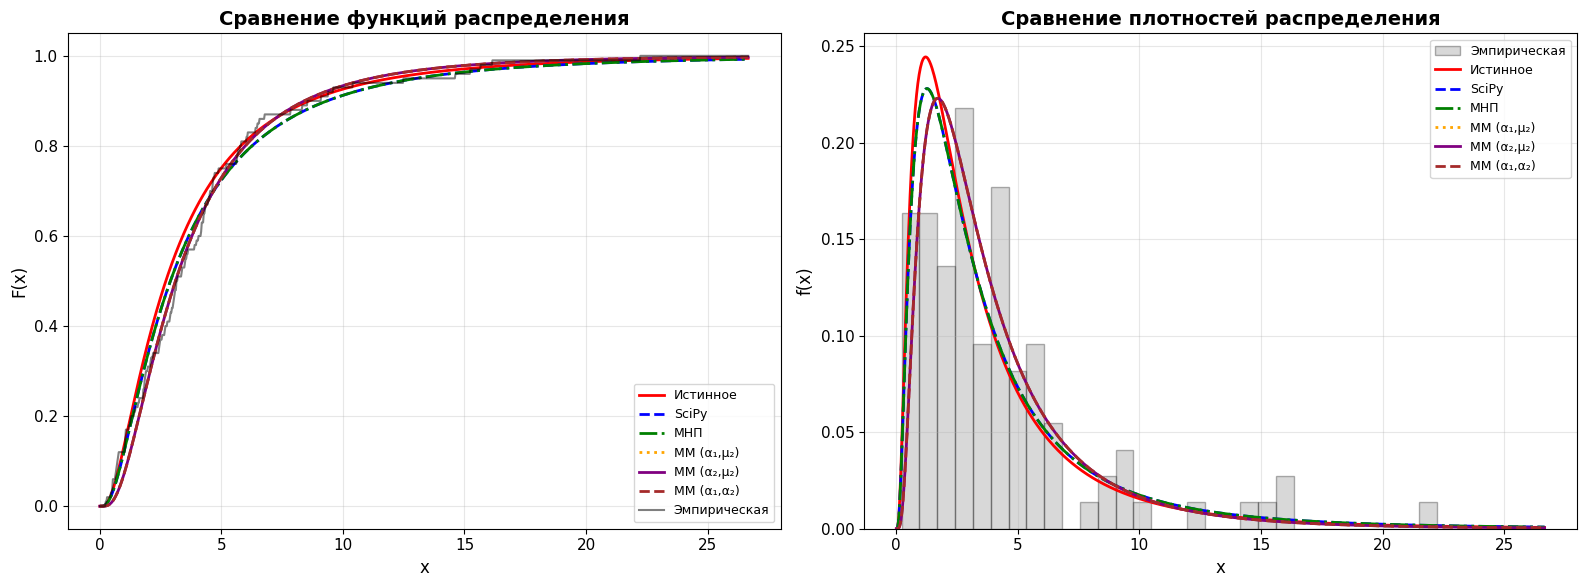

In [27]:
# Подготовка данных для сравнения
x_range = np.linspace(0.01, np.max(sample)*1.2, 1000)

# Теоретические распределения для разных методов
methods = {
    'Истинное': (a_true, b_true),
    'SciPy': (mu_scipy, sigma_scipy),
    'МНП': (mu_mle, sigma_mle),
    'ММ (α₁,μ₂)': (mu_mom1, sigma_mom1),
    'ММ (α₂,μ₂)': (mu_mom2, sigma_mom2),
    'ММ (α₁,α₂)': (mu_mom3, sigma_mom3)
}

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
linestyles = ['-', '--', '-.', ':', '-', '--']

# Графики
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Функции распределения
for (name, (mu, sigma)), color, ls in zip(methods.items(), colors, linestyles):
    cdf = lognorm.cdf(x_range, s=sigma, scale=np.exp(mu))
    axes[0].plot(x_range, cdf, label=name, color=color, linestyle=ls, linewidth=2)

axes[0].plot(x_range, empirical_cdf, label='Эмпирическая', 
             linewidth=1.5, color='black', alpha=0.5)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('F(x)', fontsize=12)
axes[0].set_title('Сравнение функций распределения', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Плотности распределения
axes[1].hist(sample, bins=30, density=True, alpha=0.3, color='gray', edgecolor='black', label='Эмпирическая')

for (name, (mu, sigma)), color, ls in zip(methods.items(), colors, linestyles):
    pdf = lognorm.pdf(x_range, s=sigma, scale=np.exp(mu))
    axes[1].plot(x_range, pdf, label=name, color=color, linestyle=ls, linewidth=2)

axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('f(x)', fontsize=12)
axes[1].set_title('Сравнение плотностей распределения', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Шаг 10. Статистический анализ качества оценок

In [28]:
# Вычисление среднеквадратичных ошибок для всех методов
mse_data = []

for name, (mu_est, sigma_est) in methods.items():
    if name == 'Истинное':
        continue
    
    mse_mu = (mu_est - a_true)**2
    mse_sigma = (sigma_est - b_true)**2
    total_mse = mse_mu + mse_sigma
    
    mse_data.append({
        'Метод': name,
        'MSE(μ)': f'{mse_mu:.8f}',
        'MSE(σ)': f'{mse_sigma:.8f}',
        'Total MSE': f'{total_mse:.8f}'
    })

mse_df = pd.DataFrame(mse_data)

print("СРЕДНЕКВАДРАТИЧНЫЕ ОШИБКИ ОЦЕНОК")
print(mse_df.to_string(index=False))

СРЕДНЕКВАДРАТИЧНЫЕ ОШИБКИ ОЦЕНОК
     Метод     MSE(μ)     MSE(σ)  Total MSE
     SciPy 0.00451647 0.00013140 0.00464787
       МНП 0.00451647 0.00013140 0.00464787
ММ (α₁,μ₂) 0.01865720 0.01560249 0.03425969
ММ (α₂,μ₂) 0.01865720 0.01560249 0.03425969
ММ (α₁,α₂) 0.01865720 0.01560249 0.03425969
